In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
normtemp = pd.read_csv("normtemp.csv")
normtemp.describe()

,Temp,Sex,Beats
count,130.0000,130.0000,130.0000
mean,98.2492,1.5000,73.7615
std,0.7332,0.5019,7.0621
min,96.3000,1.0000,57.0000
25%,97.8000,1.0000,69.0000
50%,98.3000,1.5000,74.0000
75%,98.7000,2.0000,79.0000
max,100.8000,2.0000,89.0000


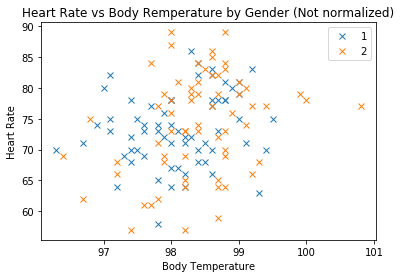

In [3]:
groups = normtemp.groupby("Sex")
for name, group in groups:
    plt.plot(group["Temp"], group["Beats"], marker='x', linestyle="", label=name)
plt.ylabel("Heart Rate")
plt.xlabel("Body Temperature")
plt.title("Heart Rate vs Body Remperature by Gender (Not normalized)")
plt.legend()

In [4]:
normalized_normtemp = (normtemp - normtemp.mean()) / normtemp.std()
normalized_normtemp.describe()

,Temp,Sex,Beats
count,130.0000,130.0000,130.0000
mean,0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-2.6586,-0.9961,-2.3735
25%,-0.6127,-0.9961,-0.6742
50%,0.0692,0.0000,0.0338
75%,0.6148,0.9961,0.7418
max,3.4790,0.9961,2.1578


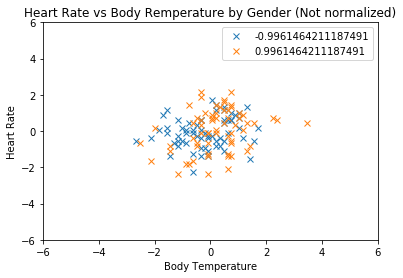

In [5]:
groups_normalized = normalized_normtemp.groupby("Sex")
for name, group in groups_normalized:
    plt.plot(group["Temp"], group["Beats"], marker='x', linestyle="", label=name)
plt.ylabel("Heart Rate")
plt.xlabel("Body Temperature")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.title("Heart Rate vs Body Remperature by Gender (Not normalized)")
plt.legend()

In [6]:
corr = 0
for i in range(0, len(normalized_normtemp - 1)):
    corr += normalized_normtemp['Temp'][i] * normalized_normtemp['Beats'][i]
corr /= len(normalized_normtemp)
corr

0.25170519962291227

In [7]:
normalized_normtemp.corr()

,Temp,Sex,Beats
Temp,1.0000,0.1980,0.2537
Sex,0.1980,1.0000,0.0558
Beats,0.2537,0.0558,1.0000


In [8]:
normtemp.corr()

,Temp,Sex,Beats
Temp,1.0000,0.1980,0.2537
Sex,0.1980,1.0000,0.0558
Beats,0.2537,0.0558,1.0000


In [9]:
bodyfat = pd.read_csv("Body Fat.csv")
bodyfat

,Subject,Density,%Body Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1,1.0708,12.3000,23,154.2500,67.7500,36.2000,93.1000,85.2000,94.5000,59.0000,37.3000,21.9000,32.0000,27.4000,17.1000
1,2,1.0853,6.1000,22,173.2500,72.2500,38.5000,93.6000,83.0000,98.7000,58.7000,37.3000,23.4000,30.5000,28.9000,18.2000
2,3,1.0414,25.3000,22,154.0000,66.2500,34.0000,95.8000,87.9000,99.2000,59.6000,38.9000,24.0000,28.8000,25.2000,16.6000
3,4,1.0751,10.4000,26,184.7500,72.2500,37.4000,101.8000,86.4000,101.2000,60.1000,37.3000,22.8000,32.4000,29.4000,18.2000
4,5,1.0340,28.7000,24,184.2500,71.2500,34.4000,97.3000,100.0000,101.9000,63.2000,42.2000,24.0000,32.2000,27.7000,17.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,248,1.0736,11.0000,70,134.2500,67.0000,34.9000,89.2000,83.6000,88.8000,49.6000,34.8000,21.5000,25.6000,25.7000,18.5000
248,249,1.0236,33.6000,72,201.0000,69.7500,40.9000,108.5000,105.0000,104.5000,59.6000,40.8000,23.2000,35.2000,28.6000,20.1000
249,250,1.0328,29.3000,72,186.7500,66.0000,38.9000,111.1000,111.5000,101.7000,60.3000,37.3000,21.5000,31.3000,27.2000,18.0000
250,251,1.0399,26.0000,72,190.7500,70.5000,38.9000,108.3000,101.3000,97.8000,56.0000,41.6000,22.7000,30.5000,29.4000,19.8000


In [10]:
bodyfat.corr()

,Subject,Density,%Body Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Subject,1.0000,-0.1064,0.1122,0.3413,0.0337,-0.0133,0.0711,0.1205,0.1217,-0.0237,-0.0807,0.0479,-0.0324,-0.0157,0.0020,0.0818
Density,-0.1064,1.0000,-0.9970,-0.2892,-0.6114,0.0184,-0.4872,-0.7003,-0.8109,-0.6232,-0.5607,-0.5119,-0.3214,-0.4921,-0.3626,-0.3492
%Body Fat,0.1122,-0.9970,1.0000,0.2902,0.6129,-0.0256,0.4907,0.7029,0.8140,0.6257,0.5613,0.5085,0.3216,0.4936,0.3622,0.3466
Age,0.3413,-0.2892,0.2902,1.0000,-0.0127,-0.2452,0.1135,0.1764,0.2304,-0.0503,-0.2001,0.0175,-0.1481,-0.0412,-0.0851,0.2135
Weight,0.0337,-0.6114,0.6129,-0.0127,1.0000,0.4869,0.8307,0.8942,0.8880,0.9409,0.8687,0.8532,0.7518,0.8004,0.6303,0.7298
Height,-0.0133,0.0184,-0.0256,-0.2452,0.4869,1.0000,0.3211,0.2268,0.1898,0.3721,0.3386,0.5005,0.4692,0.3185,0.3220,0.3978
Neck,0.0711,-0.4872,0.4907,0.1135,0.8307,0.3211,1.0000,0.7848,0.7541,0.7350,0.6957,0.6724,0.5880,0.7311,0.6237,0.7448
Chest,0.1205,-0.7003,0.7029,0.1764,0.8942,0.2268,0.7848,1.0000,0.9158,0.8294,0.7299,0.7195,0.5926,0.7279,0.5802,0.6602
Abdomen,0.1217,-0.8109,0.8140,0.2304,0.8880,0.1898,0.7541,0.9158,1.0000,0.8741,0.7666,0.7372,0.5666,0.6850,0.5033,0.6198
Hip,-0.0237,-0.6232,0.6257,-0.0503,0.9409,0.3721,0.7350,0.8294,0.8741,1.0000,0.8964,0.8235,0.6914,0.7393,0.5450,0.6301


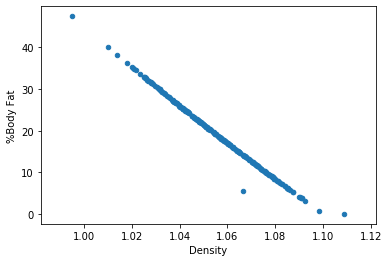

In [11]:
bodyfat.plot.scatter(x='Density', y='%Body Fat')

In [12]:
weapons = pd.read_csv("1033-program-foia-may-2014.txt")
weapons.head(5)

,State,County,NSN,Item Name,Quantity,UI,Acquisition Cost,Ship Date
0,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0000,2012-08-30
1,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0000,2012-08-30
2,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0000,2012-08-30
3,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0000,2012-08-30
4,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0000,2012-08-30


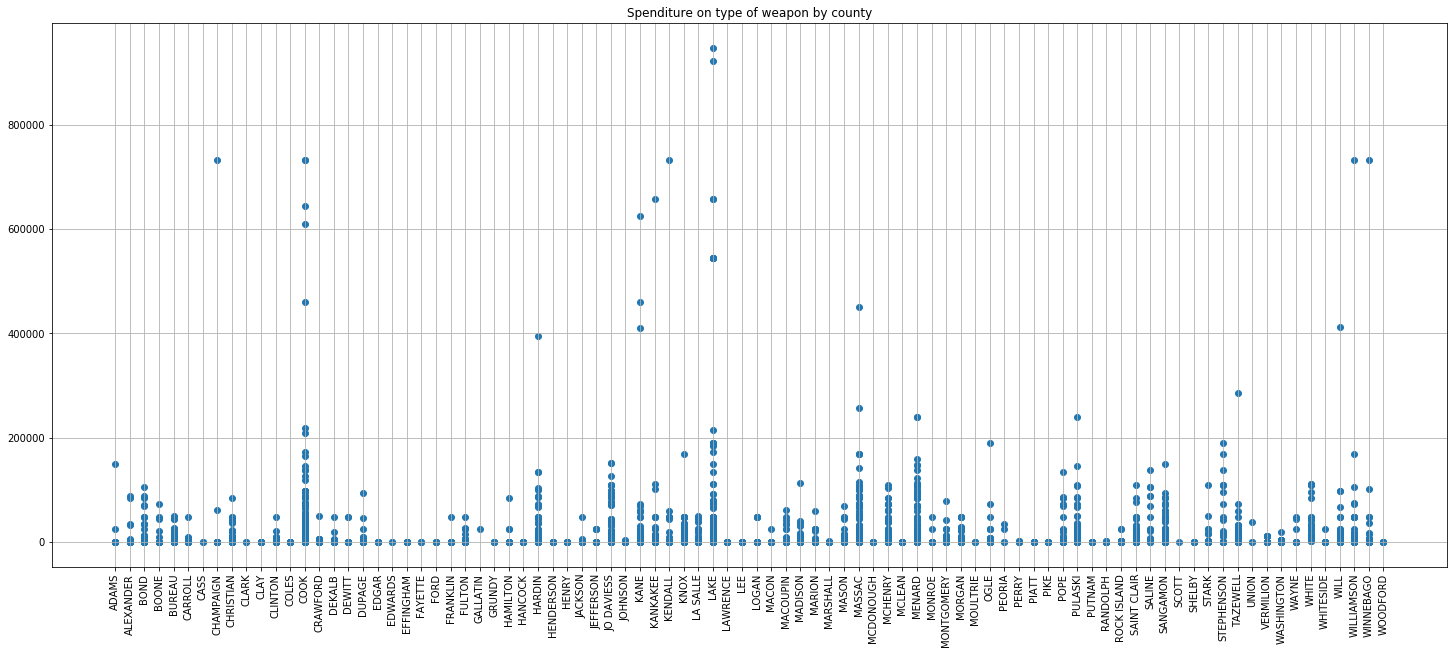

In [13]:
plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)
plt.title("Spenditure on type of weapon by county")
plt.grid(b=True)
plt.scatter(weapons[weapons.State == 'IL']["County"], weapons[weapons.State == 'IL']["Acquisition Cost"])

In [14]:
county = 'ADAMS'
weapons[weapons.State == 'IL'].query("County == @county")["Acquisition Cost"].sum()

183163.3

In [15]:
il_pop = pd.read_csv("IL_counties_population.txt")
sum_per_county = {}
for county in weapons[weapons.State == 'IL']["County"]:
    if county not in sum_per_county:
        sum_per_county[county] = float(weapons[weapons.State == 'IL'].query("County == @county")["Acquisition Cost"].sum())
           
sum_per_county_df = pd.DataFrame(list(sum_per_county.items()), columns = ['County', 'Per Capita'])
sum_per_county_df.describe()

,Per Capita
count,88.0000
mean,725646.9257
std,1674559.2024
min,138.0000
25%,6798.8150
50%,128833.2650
75%,732539.8100
max,10311527.5500


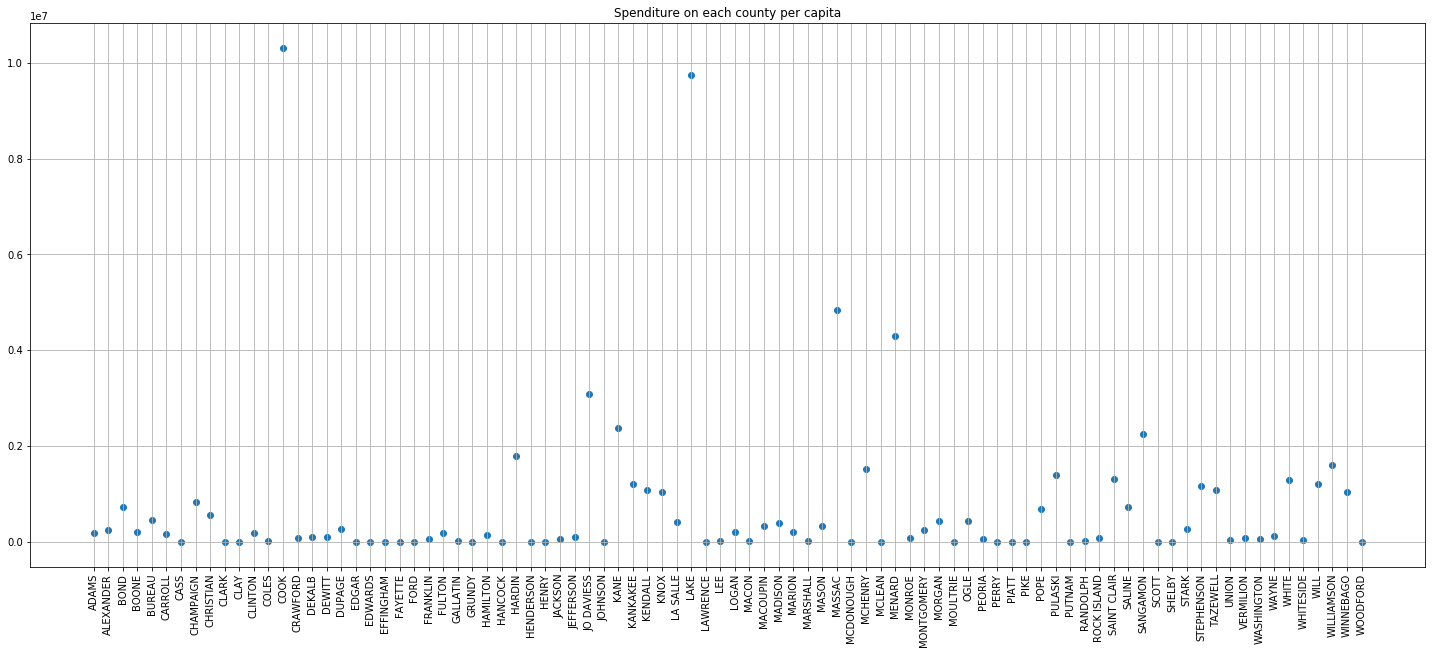

In [16]:
plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)
plt.grid(b=True)
plt.title("Spenditure on each county per capita")
plt.scatter(sum_per_county_df["County"], sum_per_county_df["Per Capita"])

In [17]:
weapons[weapons.State == 'IL']["Item Name"].value_counts()[:10]

RIFLE,5.56 MILLIMETER           3325
RIFLE,7.62 MILLIMETER            891
PISTOL,CALIBER .45,AUTOMATIC     624
TRUCK,UTILITY                    263
SIGHT,REFLEX                     207
NIGHT VISION GOGGLE               96
SHOTGUN,12 GAGE,RIOT TYPE         70
MONITOR                           60
LAPTOP COMPUTER                   58
FLAT PANEL MONITOR                55
Name: Item Name, dtype: int64

In [18]:
sum_per_item = weapons.groupby("Item Name")["Acquisition Cost"].sum()
sum_per_item = sum_per_item.to_frame()

In [19]:
sum_per_item.sort_values(by=['Acquisition Cost'], ascending=False)

,Acquisition Cost
Item Name,
MINE RESISTANT VEHICLE,219138427.0000
"TRUCK,UTILITY",196197608.8000
"AIRCRAFT, ROTARY WING",151700000.0000
"HELICOPTER,UTILITY",96323428.0000
TRUCK TRACTOR,53946988.8400
...,...
RIVETING MACHINES,0.0000
GLOBAL POSITIONING SYSTEM RECEIVER,0.0000
"CEMENT, UNUSED",0.0000


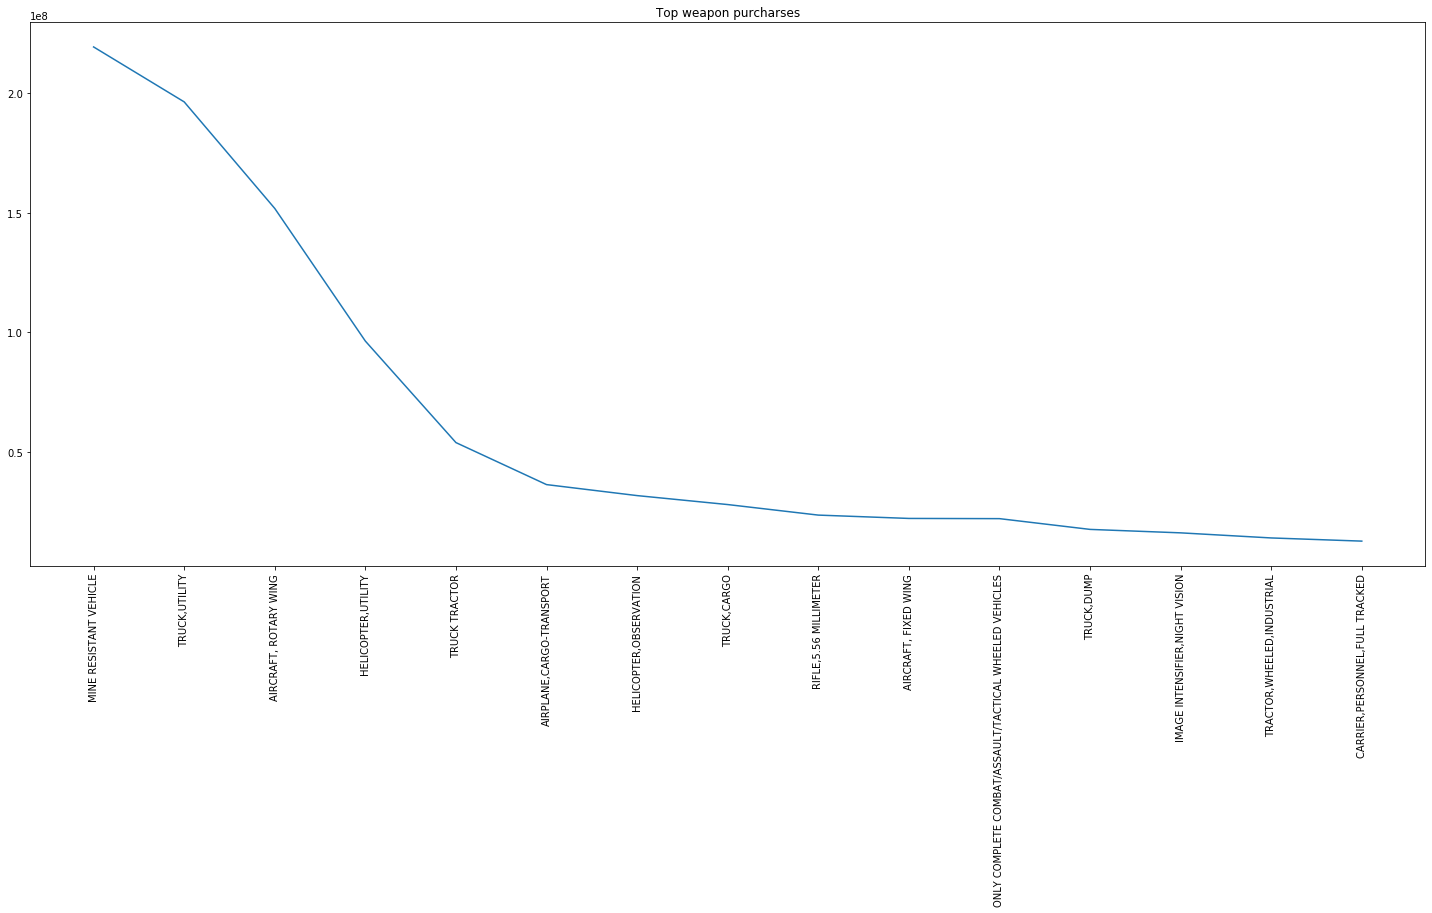

In [20]:
plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)
plt.title("Top weapon purcharses")
plt.plot(sum_per_item.sort_values(by=['Acquisition Cost'], ascending=False)[:15])

In [33]:
item_names = weapons[weapons.State == 'IL']["Item Name"].fillna("")
counties = weapons[weapons.State == 'IL']["County"].fillna("")
pattern = pd.DataFrame({"Item Name": item_names.values, "County": counties.values})
top_10 = pattern["Item Name"].value_counts()[:10].index
pattern_final = pattern.loc[pattern['Item Name'].isin(top_10)]

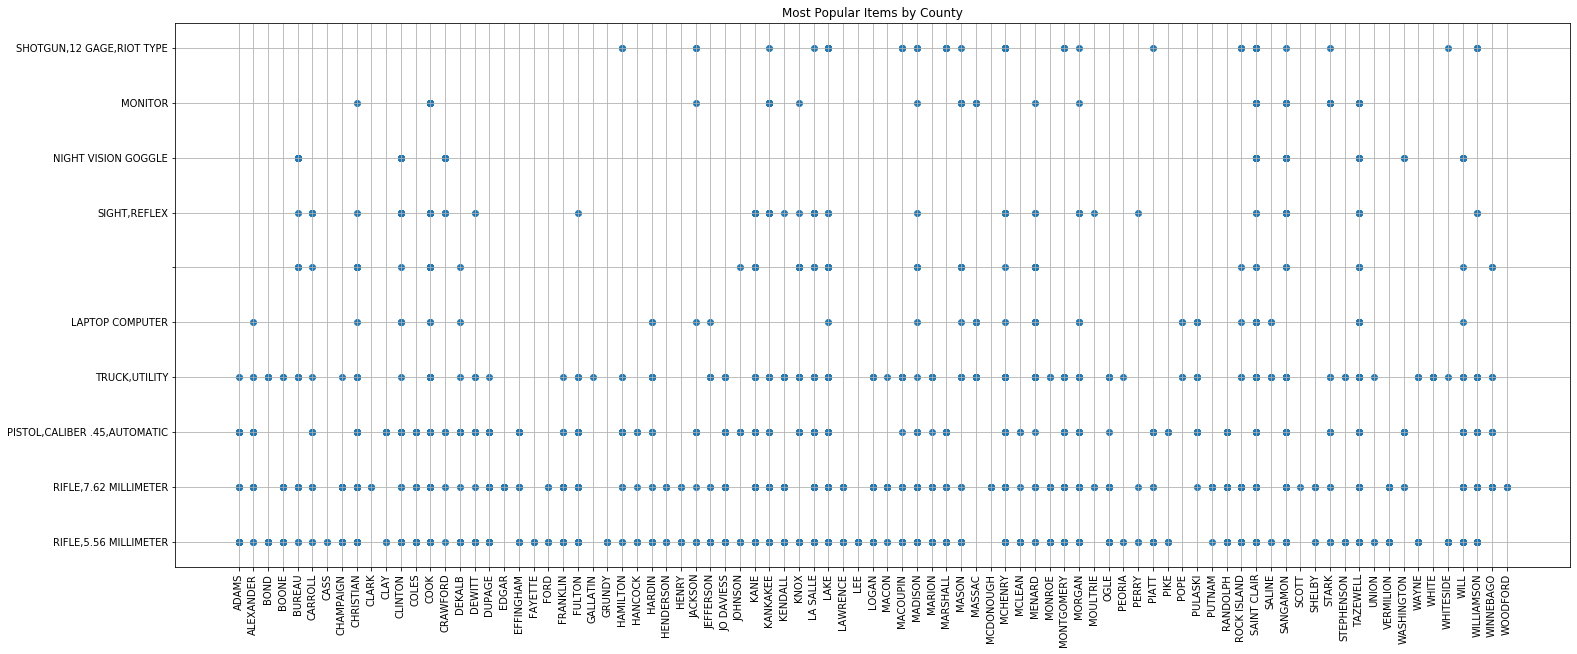

In [36]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.grid(b=True)
plt.title("Most Popular Items by County")
plt.scatter(pattern_final['County'], pattern_final['Item Name'])